# Results Analysis

## Imports

In [2]:
import os
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output

## Definitions

### Constants

In [3]:
RESULT_DIR  = '../results/'

In [4]:
RESULT_FILES = !find $RESULT_DIR -type f 

In [5]:
CLASSIC_METHODS = [
    'random_sampling',
    'margin_sampling',
    'training_utility_sampling',
    'density_weighted_sampling',
    'expected_error_reduction'
]

HARDNESS_MEASURES = [
    "borderline_points_sampling",
    "class_balance_sampling",
    "class_likelihood_sampling",
    "class_likeliood_diff_sampling",
    "disjunct_class_percentage_sampling",
    "disjunct_size_sampling",
    "f1_sampling",
    "f2_sampling",
    "f3_sampling",
    "f4_sampling",
    "harmfulness_sampling",
    "intra_extra_ratio_sampling",
    "k_disagreeing_neighbors_sampling",
    "local_set_cardinality_sampling",
    "ls_radius_sampling",
    "minority_value_sampling",
    "tree_depth_pruned_sampling",
    "tree_depth_unpruned_sampling",
    "usefulness_sampling"
]

### Helper Functions

In [6]:
def get_style(method):
    if method == 'random_sampling':
        return '*-'
    elif method in CLASSIC_METHODS:
        return '-'
    elif method in HARDNESS_MEASURES[:len(HARDNESS_MEASURES)//2]:
        return '+--'
    else:
        return '-.'

### Learning Curves

In [82]:
def plot_learning_curves(df, dataset, classifier):
    color_list = sns.color_palette('Paired', n_colors=len(df.columns))
    local_df = df.loc[(dataset, classifier)].T
    
    for i, column in enumerate(local_df.columns):
        # Aplica média móvel
        scores = local_df[column].rolling(window=5).mean()
        plt.plot(local_df.index + 1,
                 scores,
                 get_style(column),
                 color=color_list[i],
                 label=column )

    
    # Ordenação de legenda
    legend_handles_labels_sorted = sorted(zip(*plt.gca().get_legend_handles_labels()),
                                          key=lambda x: (not x[1] in CLASSIC_METHODS, x[1]))
    plt.legend(*zip(*legend_handles_labels_sorted), ncol=2)
    
    # Configuração da imagem
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.grid()
   
    # Titulo
    plt.title(dataset)
    plt.xlabel('Query')
    plt.ylabel('f1-score (macro)')

    

### Ranking Curves

In [86]:
def plot_ranking_curves(data: pd.DataFrame, model:str):

    ranked_df = df.loc[:, model, :].groupby('dataset').rank(ascending=True)
    mean_rank_df = ranked_df.groupby('strategy').mean().T

    color_list = sns.color_palette('Paired', n_colors=len(mean_rank_df.columns))
    for i, column in enumerate(mean_rank_df.columns):
        # Aplica média móvel
        scores = mean_rank_df[column].rolling(window=5).mean()

        plt.plot(mean_rank_df.index + 1,
                 scores,
                 get_style(column),
                 color=color_list[i],
                 label=column)


    plt.gca().invert_yaxis()
    
    # Ordenação de legenda
    legend_handles_labels_sorted = sorted(zip(*plt.gca().get_legend_handles_labels()),
                                          key=lambda x: (not x[1] in CLASSIC_METHODS, x[1]))
    
    plt.legend(*zip(*legend_handles_labels_sorted), ncol=2)
    
    # Configuração da imagem
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.grid()
   
    # Titulo
    plt.title(f'Ranking Curves ({model})')
    plt.xlabel('Query')
    plt.ylabel('Avg. Rank')
   

## Data Gathering

In [7]:
data = {
    os.path.splitext(os.path.basename(f))[0]: pd.read_csv(f, index_col=0).mean(axis='columns')
    for f in RESULT_FILES
}

In [77]:
index_columns = ['dataset', 'model', 'strategy']

In [78]:
df = pd.DataFrame(data).T.reset_index(names='file_name')
df[index_columns] = df.file_name.str.split('#', expand=True)
df = df.set_index(index_columns).drop(columns='file_name')

<Axes: title={'center': 'Datasets analisados por estratégia'}, ylabel='strategy'>

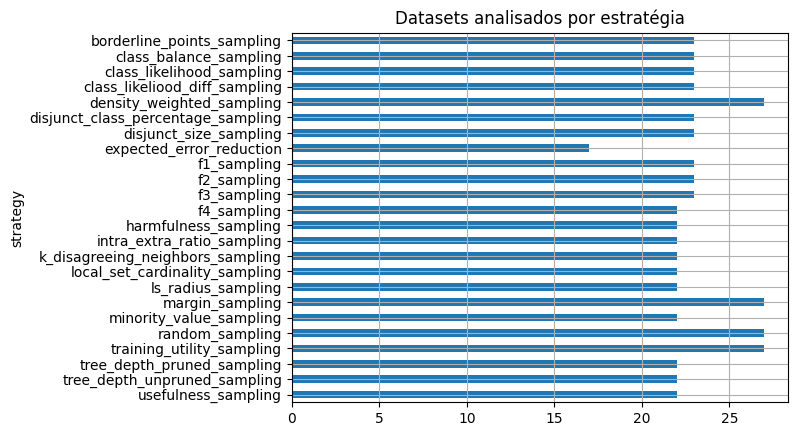

In [79]:
df.reset_index().strategy.value_counts().sort_index(ascending=False).plot(
    kind='barh', grid=True, title="Datasets analisados por estratégia")

## Learning Curves

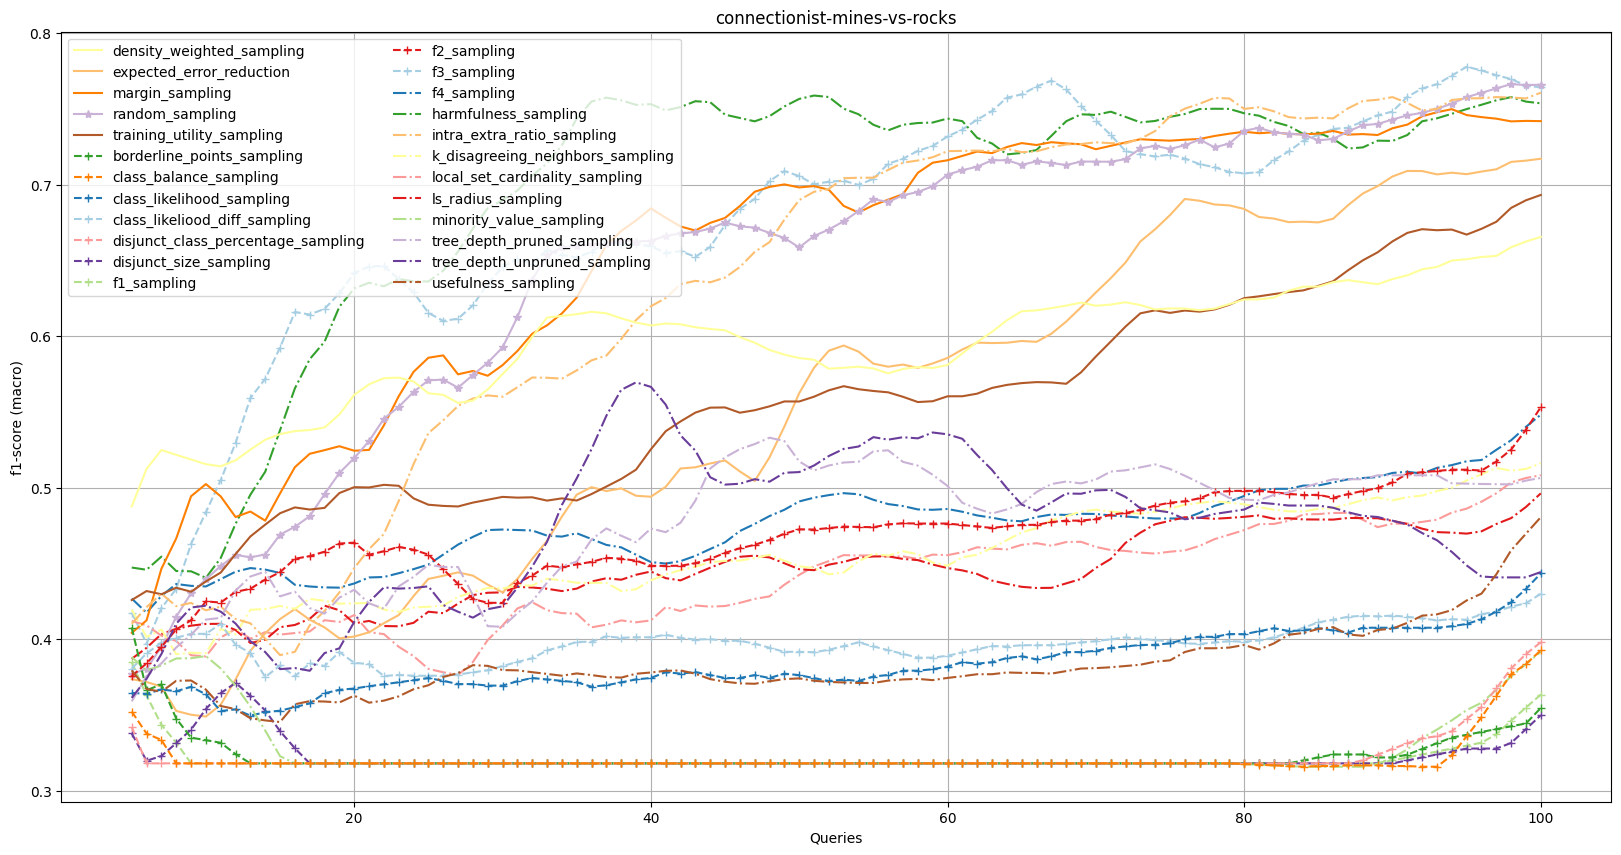

 q


In [81]:
for dataset in df.index.levels[0]:
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', Warning)
        plot_learning_curves(df, dataset=str(dataset), classifier='SVC')    
    
    display(plt.gcf())
    if input() == 'q':
        break

    clear_output(wait=True)
    plt.close()
plt.close()

## Ranking Curves

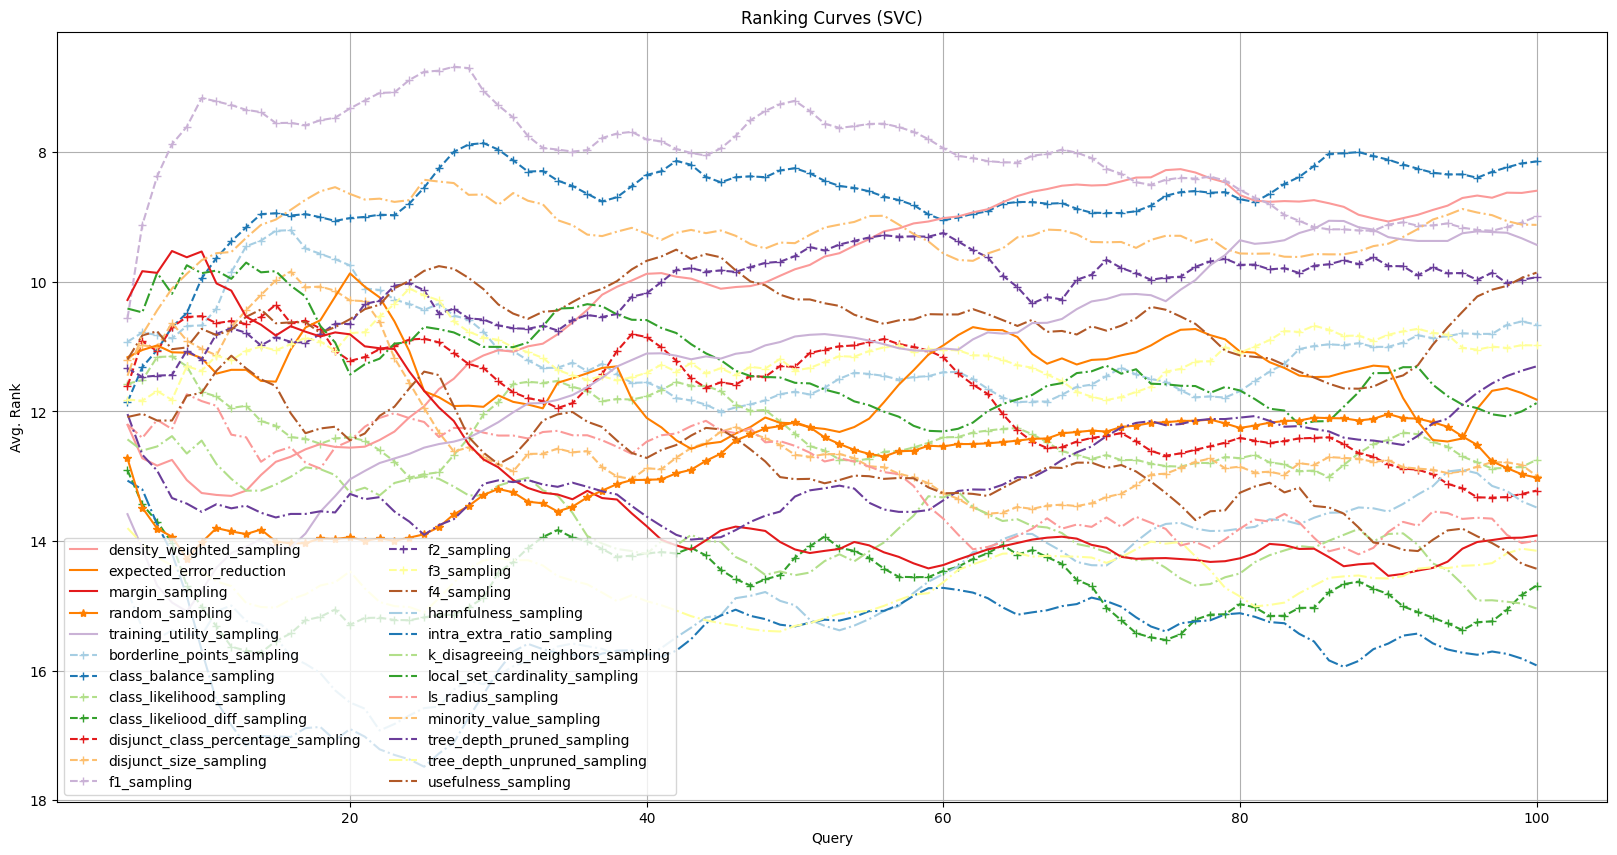

In [87]:
plot_ranking_curves(df, model='SVC')